# *Cargamos data y primer procesamiento*

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json
import sqlite3


# Cambiar directorio a carpeta del proyecto
os.chdir('C:/Python/my_projects/dexboost/')
print(os.getcwd())

C:\Python\my_projects\dexboost


In [4]:
def conectar_db(ruta_db: str):
    try:
        conn = sqlite3.connect(ruta_db)
        print("Conexión exitosa a la base de datos.")
        return conn
    except sqlite3.Error as e:
        print(f"Error al conectar con la base de datos: {e}")
        raise

def cerrar_conexion(conn):
    try:
        if conn:
            conn.close()
            print("Conexión cerrada correctamente.")
    except sqlite3.Error as e:
        print(f"Error al cerrar la conexión: {e}")
        raise

def cargar_tabla(conn, tabla):
    try:
        query = f"SELECT * FROM {tabla}"
        df = pd.read_sql(query, conn)
        return df
    except sqlite3.DatabaseError as e:
        print(f"Error al cargar la tabla '{tabla}': {e}")
        raise

# Conexión a la base de datos
conn = conectar_db('data/main_2025-02-22_13-37-47.db')

# Cargar tabla 'Analysis'
df_boost = cargar_tabla(conn, 'analysisLiquidityPool')

# Cerrar conexión

cerrar_conexion(conn)

Conexión exitosa a la base de datos.
Conexión cerrada correctamente.


In [15]:
data = pd.read_csv('data/AnalysisDex3.txt')
data

,id,Time,CreatedAt,NumberOfSocials,BoostAmount,TokenName,StartPrice,StartMktCap,StartLiquidity,IsPump,TokenMint,Risks,PriceHistory
0,1,2025-01-03T14:11:43.521+01:00,2025-01-02T18:35:19.000+01:00,2,30,DOGIUS MAXIMUS,0.000027,26988,"{""usd"":6646.44,""base"":123081949,""quote"":15.5511}",0,HmJ5ospo7my38GhCSApxc32BnQZMmdS3PwkD1fnto8RK,"[{""Name"":""Low amount of LP Providers"",""Descrip...","""[{\""price\"":\""0.00002723038863479164\"",\""time..."
1,2,2025-01-03T14:13:19.090+01:00,2025-01-03T14:08:59.000+01:00,0,10,ZAILGO,0.005078,507832441,"{""usd"":209115.57,""base"":20614613,""quote"":487.7...",0,EcwoHuB1zH1su46AV6Z2XU27CTbMW1Fn4PjZJDcqvEF9,"[{""Name"":""Large Amount of LP Unlocked"",""Descri...","""[{\""price\"":\""0.005347783152681791\"",\""time\""..."
2,3,2025-01-03T14:19:12.988+01:00,2025-01-03T14:11:25.000+01:00,2,10,Dogius Maximus,0.000127,127233,"{""usd"":42143.15,""base"":165500590,""quote"":99.06...",1,5ABhEwJgZLeQxyB25z88nFbHjjm1LJEs8iDJ2CSmpump,"[{""Name"":""Low amount of LP Providers"",""Descrip...","""[{\""price\"":\""0.00012723313541830708\"",\""time..."
3,4,2025-01-03T14:20:18.348+01:00,2025-01-03T13:47:41.000+01:00,2,500,Keir Starmer,0.000195,195194,"{""usd"":54779.73,""base"":140497220,""quote"":128.5...",1,BiTbpHw253ceCPXke9k1uFSzjFhoqjdobVemLq6pump,"[{""Name"":""Low amount of LP Providers"",""Descrip...","""[{\""price\"":\""0.00020345715042533727\"",\""time..."
4,5,2025-01-03T14:21:23.858+01:00,2025-01-03T11:04:14.000+01:00,2,50,CHIZZLER,0.000056,55813,"{""usd"":28954.05,""base"":257793281,""quote"":68.5105}",1,7C6DYeYFZRUjysPeHTVEsopxkXynNNz9sskjBwUspump,"[{""Name"":""Low amount of LP Providers"",""Descrip...","""[{\""price\"":\""0.000053050589716867185\"",\""tim..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3511,3512,2025-01-12T12:51:04.398+01:00,2025-01-12T12:34:24.000+01:00,2,3500,BurpCoin,0.000234,234163,"{""usd"":54467.14,""base"":116572000,""quote"":145.5...",1,CNx1LrMuYCQx6hdfUDdWUE537sgkMj9kYb355cHZpump,"[{""Name"":""Low amount of LP Providers"",""Descrip...","""[{\""price\"":\""0.00020104229833577383\"",\""time..."
3512,3513,2025-01-12T12:52:11.509+01:00,2025-01-12T12:34:24.000+01:00,2,4000,BurpCoin,0.000202,202261,"{""usd"":50731.93,""base"":126840636,""quote"":134.2...",1,CNx1LrMuYCQx6hdfUDdWUE537sgkMj9kYb355cHZpump,"[{""Name"":""Low amount of LP Providers"",""Descrip...","""[{\""price\"":\""0.00020344547404173597\"",\""time..."
3513,3514,2025-01-12T12:56:17.993+01:00,2025-01-12T08:47:18.000+01:00,4,50,Spare Parts Universe,0.000160,160530,"{""usd"":45885.57,""base"":141597083,""quote"":123.977}",1,G8FMb99PyHSvW7uQvdRCMfkeZgcGBwexR6BiaMxfpump,"[{""Name"":""Low amount of LP Providers"",""Descrip...","""[{\""price\"":\""0.0002028995498132391\"",\""time\..."
3514,3515,2025-01-12T13:10:20.668+01:00,2024-10-09T22:45:04.000+02:00,3,10,11 Flips,0.000022,22023,"{""usd"":18507.3,""base"":431685862,""quote"":48.2298}",1,74ohAfVraGst3SSNmgp5zhsMJrRB9djm19ynG2drpump,"[{""Name"":""Low amount of LP Providers"",""Descrip...","""[{\""price\"":\""0.00002204467612295139\"",\""time..."


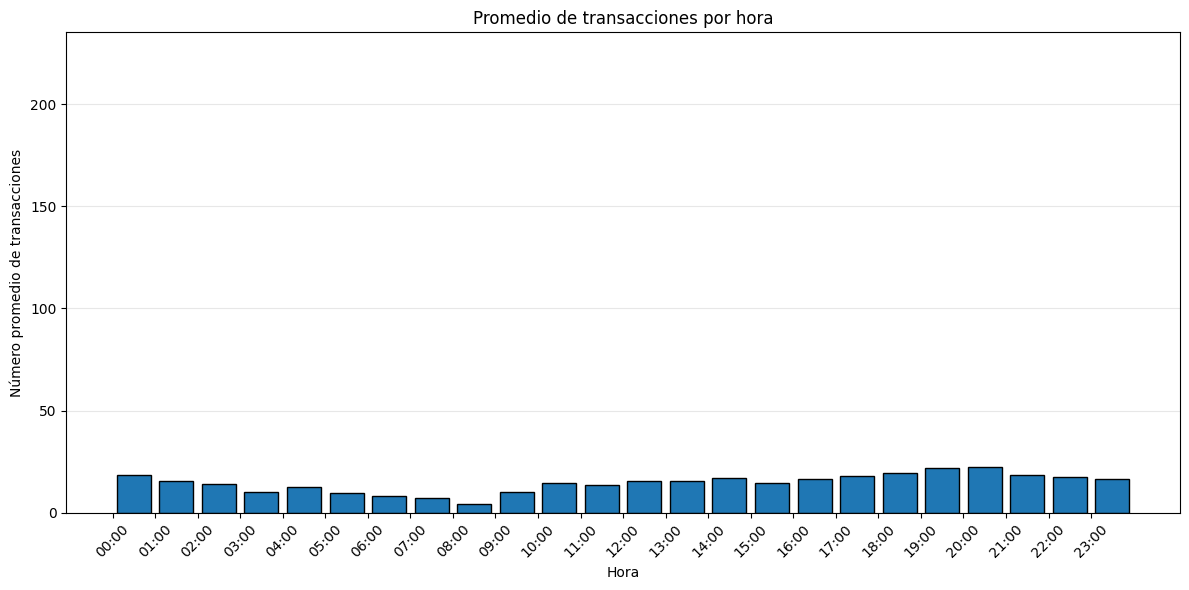

In [18]:
# Convert Time to datetime and calculate the number of unique days in the dataset
data['Time'] = pd.to_datetime(data['Time'])
days = len(data['Time'].dt.date.unique())

# Ensure Time is in datetime format and convert to Madrid timezone
data['Hour'] = pd.to_datetime(data['Time']).dt.tz_convert('Europe/Madrid').dt.hour

# Create histogram and normalize by number of days
plt.figure(figsize=(12, 6))
counts, bins, patches = plt.hist(data['Hour'], bins=24, range=(0, 24), edgecolor='black', rwidth=0.8)
counts = counts / days  # Normalize counts by number of days

# Update the height of each bar with normalized values
for patch, count in zip(patches, counts):
    patch.set_height(count)

# Customize x-axis to show hours in Spanish format (24h)
plt.xticks(range(24), [f'{h:02d}:00' for h in range(24)], rotation=45)

plt.title('Promedio de transacciones por hora')
plt.xlabel('Hora')
plt.ylabel('Número promedio de transacciones')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()


Número de transacciones por día:
Monday: 600
Tuesday: 482
Wednesday: 170
Thursday: 333
Friday: 740
Saturday: 661
Sunday: 530


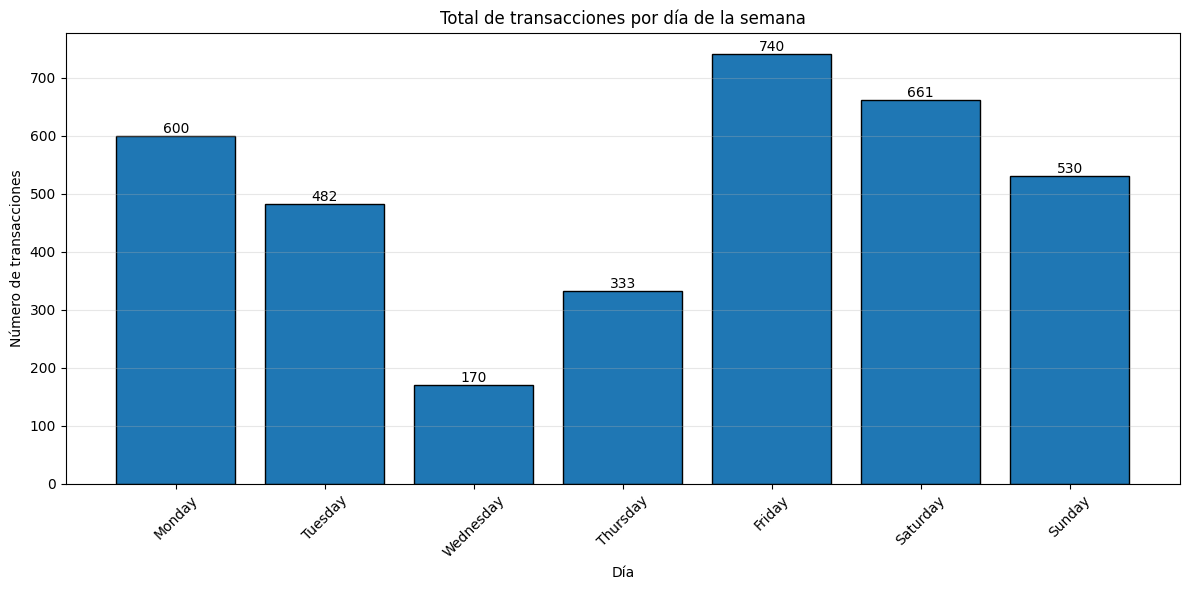

In [21]:
# Convert Time to datetime if not already
data['Time'] = pd.to_datetime(data['Time'])

# Group by day of week and count occurrences
day_counts = data.groupby(data['Time'].dt.day_name()).size()

# Define the order of days
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Reorder the series according to day_order
day_counts = day_counts.reindex(day_order)

# Create bar plot
plt.figure(figsize=(12, 6))
bars = plt.bar(day_counts.index, day_counts.values, edgecolor='black')

# Customize the plot
plt.title('Total de transacciones por día de la semana')
plt.xlabel('Día')
plt.ylabel('Número de transacciones')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom')

plt.tight_layout()

# Print the values
print("\nNúmero de transacciones por día:")
for day in day_order:
    print(f"{day}: {day_counts[day]}")

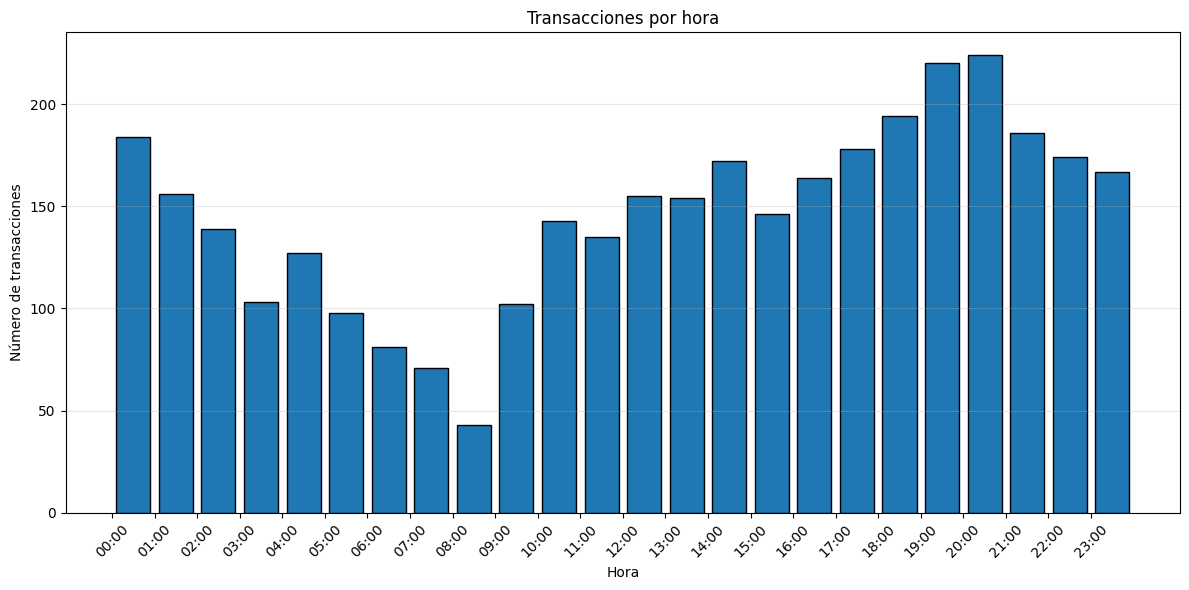

In [22]:
# Ensure DetectedAt is in datetime format and convert to Madrid timezone
data['Hour'] = pd.to_datetime(data['Time']).dt.tz_convert('Europe/Madrid').dt.hour

# Create histogram
plt.figure(figsize=(12, 6))
counts, bins, patches = plt.hist(data['Hour'], bins=24, range=(0, 24), edgecolor='black', rwidth=0.8)

# Customize x-axis to show hours in Spanish format (24h)
plt.xticks(range(24), [f'{h:02d}:00' for h in range(24)], rotation=45)

plt.title('Transacciones por hora')
plt.xlabel('Hora')
plt.ylabel('Número de transacciones')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()

In [6]:
df_boost

,id,DetectedAt,TokenName,TokenMint,IsPump,TotalLiquidity,TotalLPProviders,Markets,Risks,RugScore,PriceHistory
0,1,2025-01-29T21:02:20.499+01:00,DeepSynth R-1,EVArar7QcuCt2NwtBkBEnR2dz7G6ScWjUhRPT6tYpump,1,138750.888437,1,"[{""pubkey"":""BqRd2W755MLP4LrgzQtqdhygFkv9bwLcpJ...","[{""name"":""Large Amount of LP Unlocked"",""value""...",38551,"""[{\""time\"":\""2025-01-29T21:02:40.420+01:00\""}..."
1,2,2025-01-29T21:03:45.596+01:00,NVIDIA,2CYdifUi1txqQFAeN8zVtrNC4A9N1ea6WyBkcp3jy6Q5,0,0.000000,0,null,"[{""name"":""Top 10 holders high ownership"",""valu...",28200,"""[{\""time\"":\""2025-01-29T21:03:52.131+01:00\""}..."
2,3,2025-01-29T21:04:10.313+01:00,America's Favorite Kid,ESMh9LVwWoBWeNqv22LfLR2uBDQmoGxMJVRwGE1oXAFK,0,8847.167494,1,"[{""pubkey"":""5kehVjZePGTBTeuPJD7jpHNxT9cTaJN2t7...","[{""name"":""Large Amount of LP Unlocked"",""value""...",21063,"""[{\""time\"":\""2025-01-29T21:04:12.579+01:00\""}..."
3,4,2025-01-29T21:06:47.831+01:00,The Golden Age,FKqQ5WbRQdgQELr1eChdrAwFLip2cKKJkcaf6Vmtmoon,0,110768.153423,1,"[{""pubkey"":""4F7khQzPjKSqnrzyrJFkNauSRyvcwVUTL6...","[{""name"":""Large Amount of LP Unlocked"",""value""...",20774,"""[{\""price\"":\""0.129736\"",\""time\"":\""2025-01-2..."
4,5,2025-01-29T21:07:13.068+01:00,Alibooba,EwMkcTq7eCfihJgVsAimyNeNkSCyAZ7heqEKdC8opump,1,37643.668532,1,"[{""pubkey"":""6LNgBqc3CFJBBKdFeyZHVqch3GfQEWM1n2...","[{""name"":""Large Amount of LP Unlocked"",""value""...",11397,"""[{\""price\"":\""0.00006120065162019301\"",\""time..."
...,...,...,...,...,...,...,...,...,...,...,...
3974,3975,2025-02-01T15:25:54.422+01:00,MineTard AI,47b4RaFAuxDXGpNdDFHGxT6zEPzWJX64NtwtEcd3pump,1,0.000000,0,null,"[{""name"":""Low Liquidity"",""value"":""$0.00"",""desc...",6600,"""[{\""price\"":\""0.00638814\"",\""time\"":\""2025-02..."
3975,3976,2025-02-01T15:25:55.684+01:00,MineTard AI,47b4RaFAuxDXGpNdDFHGxT6zEPzWJX64NtwtEcd3pump,1,0.000000,0,null,"[{""name"":""Low Liquidity"",""value"":""$0.00"",""desc...",6600,"""[{\""price\"":\""0.00638814\"",\""time\"":\""2025-02..."
3976,3977,2025-02-01T15:27:03.736+01:00,DeepSeek,B8cNSaFkyNGZTeT2yQ2e4v41gX6WBwMEDWCdW6PBh5xJ,0,170685.287069,1,"[{""pubkey"":""66aiDV1oMVR9aNrDK6yFoGaPtD2shvbEnk...","[{""name"":""Large Amount of LP Unlocked"",""value""...",13399,"""[{\""price\"":\""0.916522\"",\""time\"":\""2025-02-0..."
3977,3978,2025-02-01T15:27:04.221+01:00,DeepSeek,B8cNSaFkyNGZTeT2yQ2e4v41gX6WBwMEDWCdW6PBh5xJ,0,170685.287069,1,"[{""pubkey"":""66aiDV1oMVR9aNrDK6yFoGaPtD2shvbEnk...","[{""name"":""Large Amount of LP Unlocked"",""value""...",13399,"""[{\""price\"":\""0.916522\"",\""time\"":\""2025-02-0..."


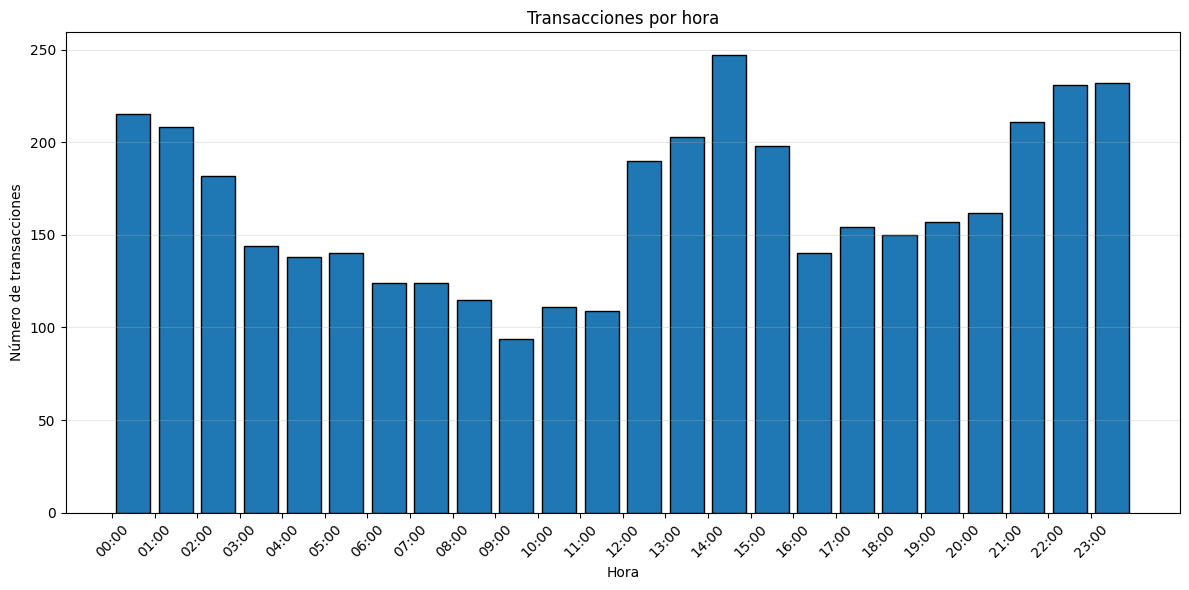

In [14]:
# Ensure DetectedAt is in datetime format and convert to Madrid timezone
df_boost['Hour'] = pd.to_datetime(df_boost['DetectedAt']).dt.tz_convert('Europe/Madrid').dt.hour

# Create histogram
plt.figure(figsize=(12, 6))
counts, bins, patches = plt.hist(df_boost['Hour'], bins=24, range=(0, 24), edgecolor='black', rwidth=0.8)

# Customize x-axis to show hours in Spanish format (24h)
plt.xticks(range(24), [f'{h:02d}:00' for h in range(24)], rotation=45)

plt.title('Transacciones por hora')
plt.xlabel('Hora')
plt.ylabel('Número de transacciones')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()

In [5]:
def initial_processing(df):
    """
    Processes initial df to facilitate later analysis:
        -Convert datetime columns into datetime.
        -Calculate adjustedboostamount
        -Calculate TokenAge (mins)
        -Parse StartLiquidity column to extract liquidity in USD
        -Calculate BoostID for later analysis.
    """

    df = df.copy()

    # Format datetime columns
    df['BoostTime'] = pd.to_datetime(df['Time'].astype(str).str[:19])
    df['CreatedAt'] = pd.to_datetime(df['CreatedAt'].astype(str).str[:19])

    # Create TokenAge from previous 2 columns
    df['TokenAge'] = ((df['BoostTime'] - df['CreatedAt']).dt.total_seconds() / 60).round(2)

    # Parse StartLiquidity column
    df['StartLiquidityUSD'] = df['StartLiquidity'].apply(lambda x: json.loads(x.replace("'", '"')).get('usd', 0.0))

    # Create AdjustedBoostAmount
    df['AdjustedBoostAmount'] = df.groupby('TokenMint')['BoostAmount'].diff()
    mask = df['AdjustedBoostAmount'].isna() | (df['AdjustedBoostAmount'] < 0) # Replace NaN and negative values with original BoostAmount
    df.loc[mask, 'AdjustedBoostAmount'] = df.loc[mask, 'BoostAmount']

    # Create BoostID to identify amount of boosts per token
    df['BoostID'] = df.groupby('TokenMint')['Time'].rank(method='dense', ascending=True).astype(int)

    # Drop ID column if exists
    df.drop(columns='id', errors='ignore', inplace=True)

    # Reset index
    df.reset_index(drop=True, inplace=True)

    # Create RugScore column
    def calculate_total_risks(risks):
        try:
            if pd.isna(risks) or not risks:
                return 0
            risks_data = json.loads(risks.replace("'", '"')) if isinstance(risks, str) else risks
            return sum(r.get('Score', 0) for r in risks_data)
        except json.JSONDecodeError:
            return 0
    
    df['RugScore'] = df['Risks'].apply(calculate_total_risks)

    # Create cols to keep with correct order
    cols_to_keep = ['TokenMint', 'TokenName', 'BoostTime', 'BoostID', 'StartPrice', 'AdjustedBoostAmount', 'TokenAge', 'StartMktCap', 
                    'StartLiquidityUSD', 'RugScore', 'IsPump', 'PriceHistory']
    
    return df[cols_to_keep]


df_analysis = initial_processing(df_boost)


KeyError: 'Time'

In [5]:
df_analysis

,TokenMint,TokenName,BoostTime,BoostID,StartPrice,AdjustedBoostAmount,TokenAge,StartMktCap,StartLiquidityUSD,RugScore,IsPump,PriceHistory
0,CVRR1ZcB6LRkybpUJRRcwc3LZDuc6hH7g8Uxihegpump,TrumpChillGayWiFMelania47jelly,2025-02-02 18:57:30,1,1.016000e-03,1000.0,64.83,1016395,120760.57,400,1,"""[{\""price\"":\""0.000959949675284896\"",\""time\""..."
1,54AKRYHqTcezAfphPpt6zkwwpPhpxrjmhUmeAhP2moon,CartmansCupidMe,2025-02-02 19:15:53,1,4.452000e-04,200.0,1165.30,441093,81935.39,500,0,"""[{\""price\"":\""0.00044671332048235057\"",\""time..."
2,7ijSVonxHLeKYQju2SeX9bPrBk1aPbmAneyHGuvpump,Mr Methane,2025-02-02 19:31:14,1,3.990000e-04,10.0,176.13,399080,77384.36,400,1,"""[{\""price\"":\""0.00040750145942345365\"",\""time..."
3,7o4brFe2g6P1RZNKGuvYDa7FT4fi6JvykUhZVHiopump,CC,2025-02-02 19:46:18,1,1.022000e-04,10.0,1199.62,102290,36648.54,11626,1,"""[{\""price\"":\""0.00009981727602284681\"",\""time..."
4,12ifMz54Sq4Ab4RiPezsbDYkY2fo5L3VTabfJJ2ppump,PAIN,2025-02-02 19:57:05,1,5.603000e-04,3610.0,189.57,560352,93173.86,100,1,"""[{\""price\"":\""0.0005705496891061883\"",\""time\..."
...,...,...,...,...,...,...,...,...,...,...,...,...
5490,HVo6KXBqAphLeZAHgjjXH8TVgq8h6vAnWoZkTZxFpump,Unemployed,2025-02-20 18:53:36,3,9.062000e-05,10.0,1444.13,90630,37024.24,300,1,"""[{\""price\"":\""0.0000768697\"",\""time\"":\""2025-..."
5491,68Jyw882wE4UkreUpK3NTG9i5ZKuSj3xLUQshEra9r3s,Unitree G1 AI,2025-02-20 19:12:21,1,1.111000e-11,500.0,47.73,474473,44560.64,2700,0,"""[{\""price\"":\""0.0000000000112469\"",\""time\"":\..."
5492,VyRUdnYshPsALZUKEW2kWfgeDi8B7ni588h1bj4pump,TOWD,2025-02-20 19:13:23,1,9.825000e-05,10.0,4.28,98258,33553.91,400,1,"""[{\""price\"":\""0.00010973\"",\""time\"":\""2025-02..."
5493,Soe9XsrSFvzAqBze2BPynm5jvW2nGwBTPFMADV6pump,Ketamine Cat,2025-02-20 19:15:01,2,1.902000e-04,20.0,5927.73,190204,51815.54,300,1,"""[{\""price\"":\""0.000190779\"",\""time\"":\""2025-0..."


In [6]:
def parse_price_history(df, tp=50, sl=-40):
    """
    Expands the PriceHistory column into multiple rows while retaining original columns.
    Calculates price variation percentage and time since the boost.
    """

    df = df.copy()

    # Ensure BoostTime is in datetime format without timezone
    df['BoostTime'] = pd.to_datetime(df['BoostTime'], errors='coerce').dt.tz_localize(None)

    # Clean and format PriceHistory column before JSON parsing
    df['PriceHistory'] = df['PriceHistory'].astype(str).str.replace(r'\\"', '"', regex=True).str.strip('"')

    # Remove NaN and empty values from PriceHistory
    df = df[df['PriceHistory'].notna() & (df['PriceHistory'] != 'nan') & (df['PriceHistory'] != '')]

    # Parse PriceHistory from string to JSON
    df['PriceHistory'] = df['PriceHistory'].apply(json.loads)

    # Remove rows where PriceHistory is an empty list
    df = df[df['PriceHistory'].apply(lambda x: isinstance(x, list) and len(x) > 0)]

    # Expand PriceHistory into separate rows while retaining original columns
    df_expanded = df.explode('PriceHistory').reset_index(drop=True)

    if df_expanded.empty:
        return pd.DataFrame(columns=['TokenMint', 'TokenName', 'BoostTime', 'BoostID', 'StartPrice', 
                                     'PriceTime', 'price', 'PriceVariation_%', 'Trigger', 'TimeSinceBoostStart'])

    # Normalize the JSON PriceHistory column into separate columns
    price_data = pd.json_normalize(df_expanded['PriceHistory'])

    if price_data.empty or 'price' not in price_data.columns or 'time' not in price_data.columns:
        return pd.DataFrame(columns=['TokenMint', 'TokenName', 'BoostTime', 'BoostID', 'StartPrice', 
                                     'PriceTime', 'price', 'PriceVariation_%', 'Trigger', 'TimeSinceBoostStart'])

    # Rename extracted columns
    price_data.columns = ['price', 'PriceTime']

    # Convert PriceTime and price to correct data types
    price_data['PriceTime'] = pd.to_datetime(price_data['PriceTime'], errors='coerce').dt.tz_localize(None)
    price_data['price'] = pd.to_numeric(price_data['price'], errors='coerce')

    # Merge processed data with original DataFrame
    df_expanded = df_expanded.drop(columns=['PriceHistory']).reset_index(drop=True)
    df_expanded = pd.concat([df_expanded, price_data], axis=1)

    # Ensure PriceHistory is correctly sorted before computing TimeSinceBoostStart
    df_expanded = df_expanded.sort_values(by=['TokenMint', 'BoostID', 'PriceTime'], ascending=True)

    # Calculate time difference since boost (in minutes)
    df_expanded['TimeSinceBoostStart'] = (df_expanded['PriceTime'] - df_expanded['BoostTime']).dt.total_seconds()
    df_expanded['TimeSinceBoostStart'] = df_expanded['TimeSinceBoostStart'].astype(int)

    # Clip negative values to prevent incorrect calculations
    df_expanded['TimeSinceBoostStart'] = df_expanded['TimeSinceBoostStart'].clip(lower=0)

    # Calculate price variation percentage
    df_expanded['PriceVariation_%'] = ((df_expanded['price'] - df_expanded['StartPrice']) / df_expanded['StartPrice']) * 100
    df_expanded['PriceVariation_%'] = df_expanded['PriceVariation_%'].round(2)

    # Assign triggers (Take Profit / Stop Loss)
    df_expanded['Trigger'] = np.select(
        [df_expanded['PriceVariation_%'] >= tp, df_expanded['PriceVariation_%'] <= sl],
        ['TP', 'SL'], default='No event'
    )

    # Select relevant columns and define data types
    cols = ['TokenMint', 'TokenName', 'BoostTime', 'BoostID', 'StartPrice', 
            'PriceTime', 'price', 'PriceVariation_%', 'Trigger', 'TimeSinceBoostStart']

    dtypes = {
        "TokenMint": 'str',
        "TokenName": 'str',
        "BoostID": 'int8',
        "StartPrice": 'float32',
        "price": 'float32',
        "TimeSinceBoostStart": 'int32',
        "Trigger": 'str'
    }

    return df_expanded[cols].astype(dtypes).reset_index(drop=True)

# Filter data before applying the function
df_to_parse = df_analysis.copy()
df_to_parse = df_to_parse[
    (df_to_parse['StartLiquidityUSD'] > 30000) &
    (df_to_parse['AdjustedBoostAmount'] >= 500) &
    (df_to_parse['StartMktCap'] > 100000) &
    (df_to_parse['RugScore'] <= 1000) &
    (df_to_parse['TokenAge'] < 15)
]

# Apply function to filtered data
price_evo_boost_data = parse_price_history(df_to_parse)





In [7]:
price_evo_boost_data

,TokenMint,TokenName,BoostTime,BoostID,StartPrice,PriceTime,price,PriceVariation_%,Trigger,TimeSinceBoostStart
0,3ALHT6WfDgjQBTxYvTvEWSJfHDSkgCEzYrsmifGbpump,REPUBLIC OF MADAGASCAR,2025-02-11 01:38:40,1,0.000165,2025-02-11 01:38:49.979,0.000156,-5.86,No event,9
1,3ALHT6WfDgjQBTxYvTvEWSJfHDSkgCEzYrsmifGbpump,REPUBLIC OF MADAGASCAR,2025-02-11 01:38:40,1,0.000165,2025-02-11 01:39:00.219,0.000156,-5.86,No event,20
2,3ALHT6WfDgjQBTxYvTvEWSJfHDSkgCEzYrsmifGbpump,REPUBLIC OF MADAGASCAR,2025-02-11 01:38:40,1,0.000165,2025-02-11 01:39:10.460,0.000156,-5.86,No event,30
3,3ALHT6WfDgjQBTxYvTvEWSJfHDSkgCEzYrsmifGbpump,REPUBLIC OF MADAGASCAR,2025-02-11 01:38:40,1,0.000165,2025-02-11 01:39:20.729,0.000148,-10.48,No event,40
4,3ALHT6WfDgjQBTxYvTvEWSJfHDSkgCEzYrsmifGbpump,REPUBLIC OF MADAGASCAR,2025-02-11 01:38:40,1,0.000165,2025-02-11 01:39:30.977,0.000148,-10.48,No event,50
...,...,...,...,...,...,...,...,...,...,...
44800,zTSRg2oVBBmcqitazKxGuNxmcap7GtopzHq79xEpump,track.exe,2025-02-14 15:04:05,1,0.000111,2025-02-14 16:11:37.355,0.000008,-93.23,SL,4052
44801,zTSRg2oVBBmcqitazKxGuNxmcap7GtopzHq79xEpump,track.exe,2025-02-14 15:04:05,1,0.000111,2025-02-14 16:11:47.711,0.000008,-93.23,SL,4062
44802,zTSRg2oVBBmcqitazKxGuNxmcap7GtopzHq79xEpump,track.exe,2025-02-14 15:04:05,1,0.000111,2025-02-14 16:11:58.031,0.000008,-93.23,SL,4073
44803,zTSRg2oVBBmcqitazKxGuNxmcap7GtopzHq79xEpump,track.exe,2025-02-14 15:04:05,1,0.000111,2025-02-14 16:12:08.419,0.000008,-93.23,SL,4083


In [8]:
def token_behavior_summary(df, max_seconds=2000, window=2, threshold =-60):
    """
    Returns summary of token behavior in max_seconds timestamp.
    Args:
        - df (pd.DataFrame): Data to extract metrics for summary
        - max_seconds (int): Maximum seconds of behavior analysis for each token.
    
    Returns:
        pd.DataFrame: Dataframe with summary metrics, such as max_price_variation and its seconds since the boost started, etc...
    """

    df = df.copy()

    # Filter all transaccions with less than max_seconds parameters

    df = df[df['TimeSinceBoostStart'] <= max_seconds]

    # Group data for token and boostid so we can extract metrics for each individual boost
    df_grouped = df.groupby(['TokenMint', 'BoostID'])

    summary_list = []

    for (tokenmint, boostid), group in df_grouped:
        group = group.sort_values(by='TimeSinceBoostStart')


        first_tp_sl = group[group['Trigger'].isin(['TP', 'SL'])]
        if not first_tp_sl.empty:
            first_event = first_tp_sl.iloc[0] # First TP or SL found
        else:
            first_event = group.iloc[0] # If there are no TP or SL, take 1st row entrance (No Trigger)
        
        # Get last event for No Trigger rows
        last_event = group.iloc[-1]


        max_price_row = group.loc[group['PriceVariation_%'].idxmax()] # Number of row to use later
        min_price_row = group.loc[group['PriceVariation_%'].idxmin()] 

        # Create binary HasRugPull column
        rolling_drop = group['price'].pct_change(periods=window, fill_method=None) * 100
        has_rugpull = (rolling_drop <= threshold).any()

        #Convert to 0 or 1 for binary column
        rugpull_flag = 1 if has_rugpull else 0

        # Start building summary list
        summary_list.append({
            'TokenMint': tokenmint, 
            'BoostID': boostid,
            'FirstTrigger': first_event['Trigger'],
            'Seconds_Trigger': first_event['TimeSinceBoostStart'],

            'MaxPriceVar': max_price_row['PriceVariation_%'],
            'MaxPriceSeconds': max_price_row['TimeSinceBoostStart'],

            'MinPriceVar': min_price_row['PriceVariation_%'],
            'MinPriceSeconds': min_price_row['TimeSinceBoostStart'],

            f'LastVariation_{max_seconds}(s)': last_event['PriceVariation_%'],

            'HasRugPull': rugpull_flag            
        })

    # Convert list into DataFrame
    summary_df = pd.DataFrame(summary_list)

    return summary_df

summary_metrics = token_behavior_summary(price_evo_boost_data)


In [10]:
summary_metrics.columns

Index(['TokenMint', 'BoostID', 'FirstTrigger', 'Seconds_Trigger',
       'MaxPriceVar', 'MaxPriceSeconds', 'MinPriceVar', 'MinPriceSeconds',
       'LastVariation_2000(s)', 'HasRugPull'],
      dtype='object')

In [9]:
summary_metrics['FirstTrigger'].value_counts()

FirstTrigger
TP          93
No event    42
SL          40
Name: count, dtype: int64